In [4]:
import torch
from torch.autograd import Variable

from torch import nn

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(3)


# make data

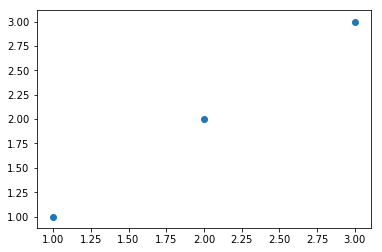

In [8]:
x_train = torch.Tensor([[1],[2],[3]])
y_train = torch.Tensor([[1],[2],[3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# Naive Model


## Define Linear model

In [9]:
x, y

(Variable containing:
  1
  2
  3
 [torch.FloatTensor of size 3x1], Variable containing:
  1
  2
  3
 [torch.FloatTensor of size 3x1])

In [10]:
W = Variable(torch.rand(1,1))
W

Variable containing:
 0.5508
[torch.FloatTensor of size 1x1]

In [43]:
x.mm(W) 

Variable containing:
 0.5508
 1.1016
 1.6524
[torch.FloatTensor of size 3x1]


## Define cost function

loss(x,y)=1/n∑|xi−yi|2loss(x,y)=1/n∑|xi−yi|2

In [44]:
cost_func = nn.MSELoss()

cost_func

MSELoss (
)


## Training Linear Regression

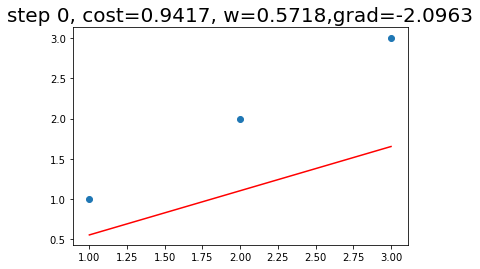

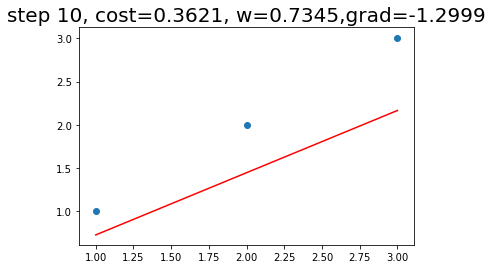

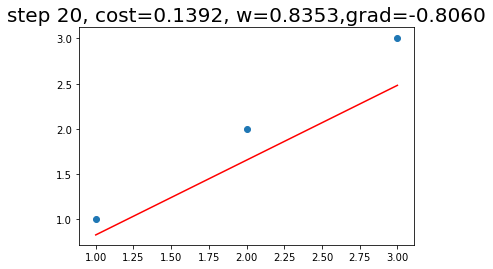

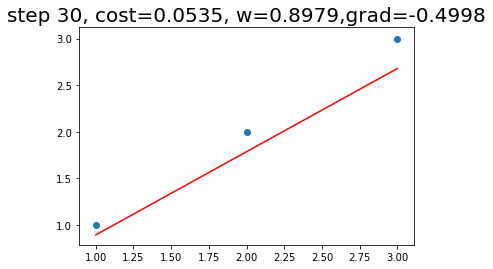

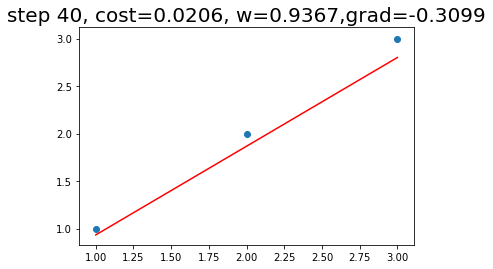

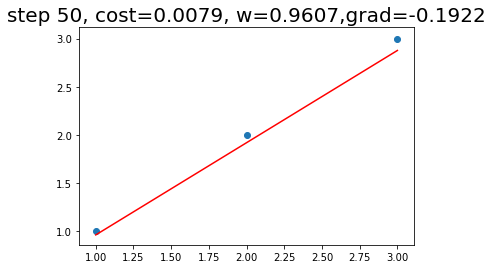

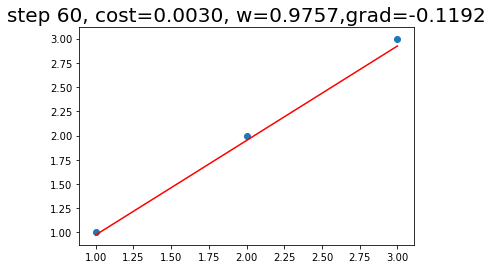

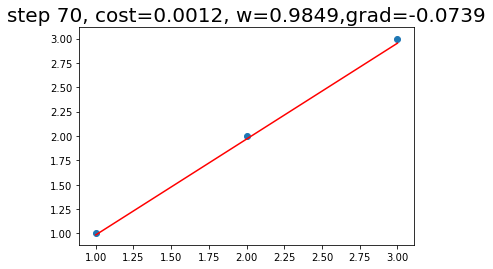

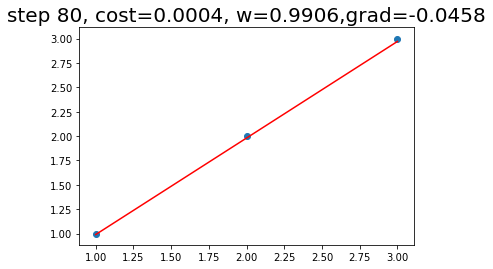

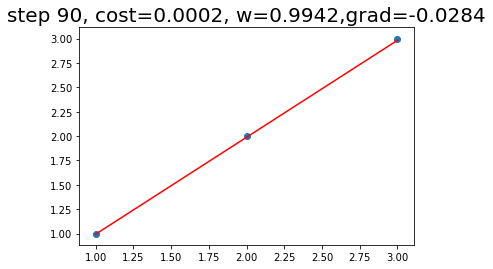

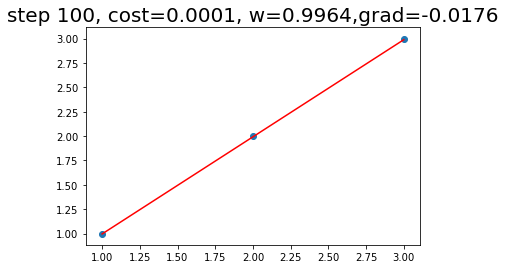

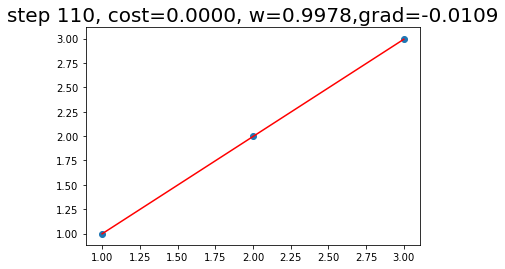

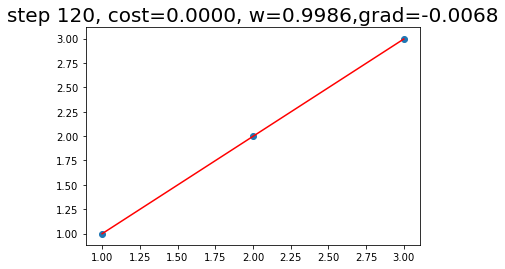

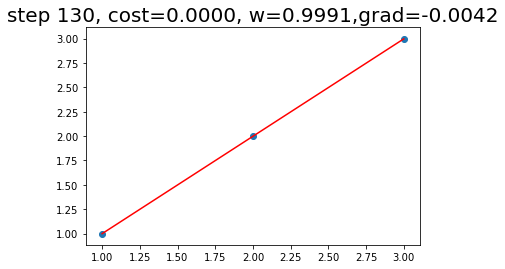

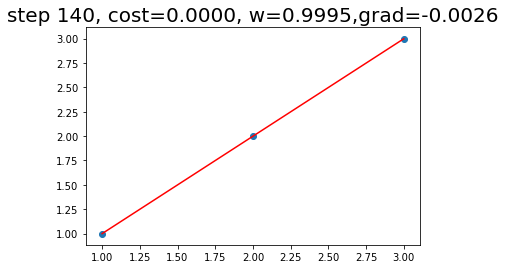

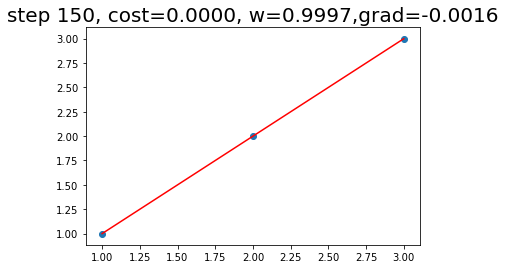

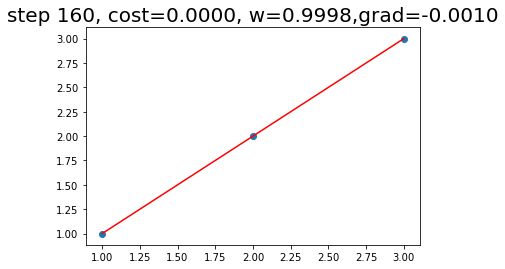

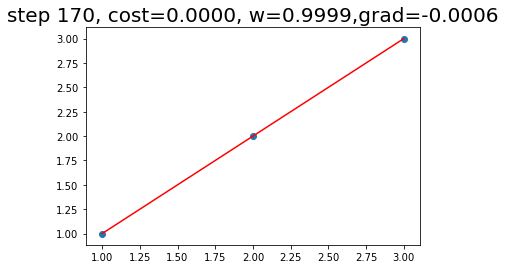

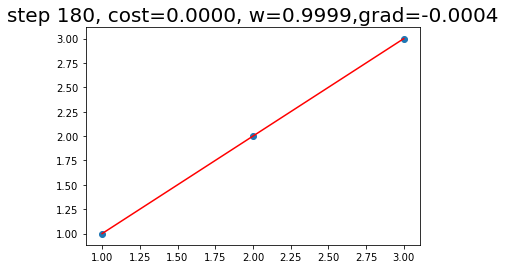

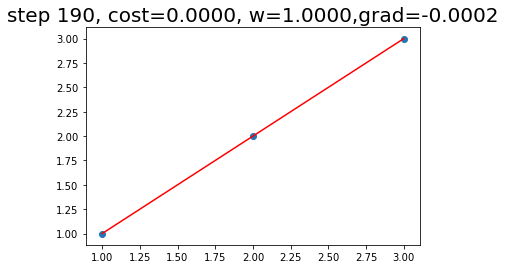

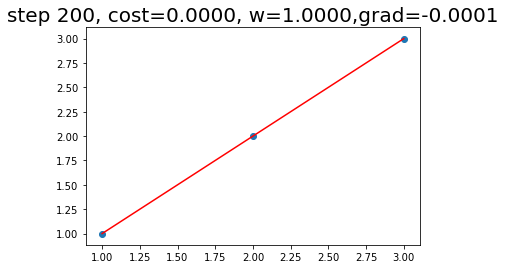

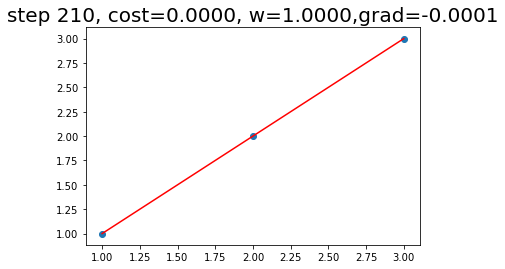

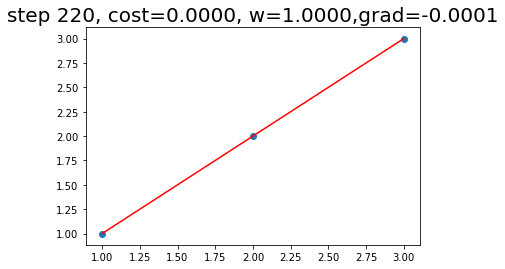

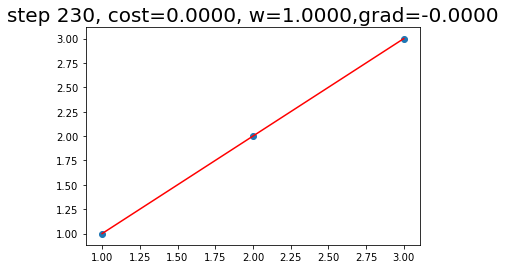

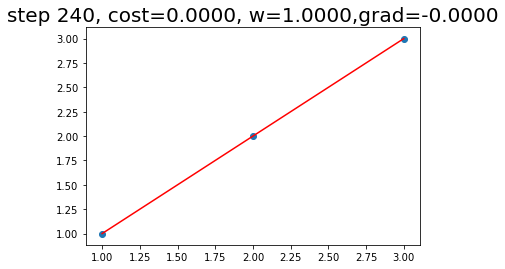

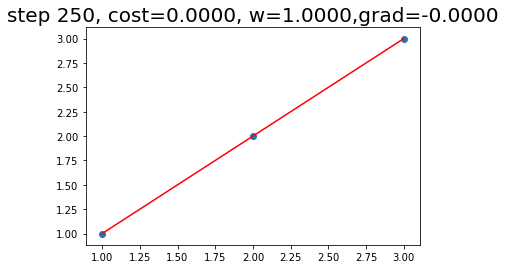

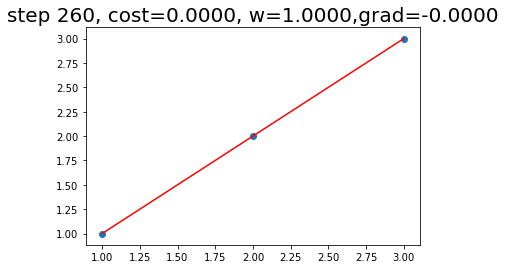

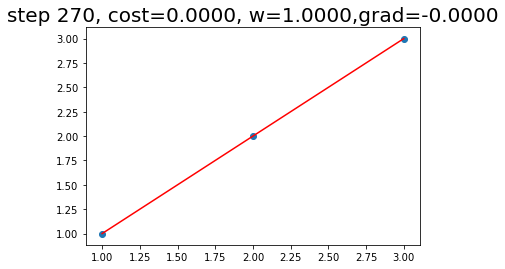

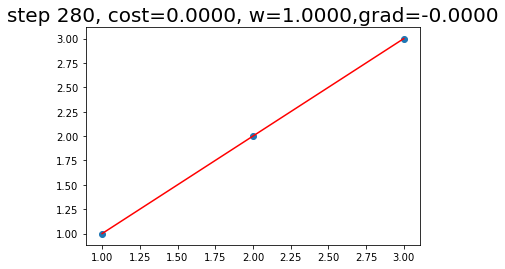

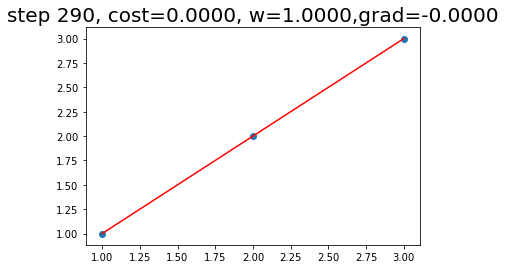

In [45]:
plt.ion()

lr = 0.01

for step in range(300):
    prediction = x.mm(W)
    cost = cost_func(prediction, y)
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)
    W -= lr * gradient
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step,cost.data[0], W.data[0][0], gradient.data[0]), fontdict={'size': 20} )
        plt.show()
    
#     if step %10 == 0:
#         print(step, "going cost")
#         print(cost)
#         print((prediction-y).view(-1))
#         print((x.view(-1)))
#         print(gradient)
#         print(W)
plt.ioff()

In [46]:
x_test = Variable(torch.Tensor([[5]]))
y_test = x_test.mm(W)
y_test

Variable containing:
 5.0000
[torch.FloatTensor of size 1x1]


# w/ nn Module

## Define Linear Model

In [11]:
model  = nn.Linear(1, 1, bias=True)

print(model)

model.weight, model.bias

Linear (1 -> 1)


(Parameter containing:
 -0.8586
 [torch.FloatTensor of size 1x1], Parameter containing:
  0.4163
 [torch.FloatTensor of size 1])

In [12]:
cost_func = nn.MSELoss()

In [13]:
for i in model.parameters():
    print(i)

Parameter containing:
-0.8586
[torch.FloatTensor of size 1x1]

Parameter containing:
 0.4163
[torch.FloatTensor of size 1]



In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


Variable containing:
 1
 2
 3
[torch.FloatTensor of size 3x1]


## Training w/ nn module

In [15]:
model(x)

Variable containing:
-0.4423
-1.3008
-2.1594
[torch.FloatTensor of size 3x1]

# plt.ion()

for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data[0],model.weight.data[0][0],model.bias.data[0]))
        plt.show()

plt.ioff()

In [56]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:5.9583


In [67]:
for step in range(300):
    prediction = model(x)
    cost = cost_func(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:6.9996


In [68]:
model.weight, model.bias

(Parameter containing:
  0.9999
 [torch.FloatTensor of size 1x1], Parameter containing:
 1.00000e-04 *
   1.7906
 [torch.FloatTensor of size 1])


###  Has "nn.MSELoss()"  Convex Cost Space?

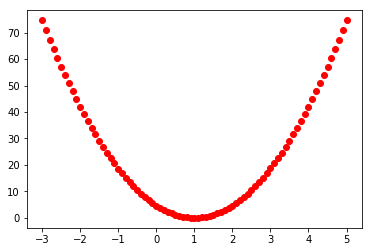

In [69]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i * 0.1
    model.weight.data.fill_(W)
    cost =  cost_func(model(x),y)
    
    W_val.append(W)
    cost_val.append(cost.data[0])

plt.plot(W_val, cost_val, 'ro')
plt.show()


# Multivariate Linear model

In [70]:
import numpy as np


## make Data

In [72]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print('shape: ', x_data.shape, '\nlength:', len(x_data), '\n', x_data )
print('shape: ', y_data.shape, '\nlength:', len(y_data), '\n', y_data )

shape:  (25, 3) 
length: 25 
 [[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]
 [  53.   46.   55.]
 [  69.   74.   77.]
 [  47.   56.   60.]
 [  87.   79.   90.]
 [  79.   70.   88.]
 [  69.   70.   73.]
 [  70.   65.   74.]
 [  93.   95.   91.]
 [  79.   80.   73.]
 [  70.   73.   78.]
 [  93.   89.   96.]
 [  78.   75.   68.]
 [  81.   90.   93.]
 [  88.   92.   86.]
 [  78.   83.   77.]
 [  82.   86.   90.]
 [  86.   82.   89.]
 [  78.   83.   85.]
 [  76.   83.   71.]
 [  96.   93.   95.]]
shape:  (25, 1) 
length: 25 
 [[ 152.]
 [ 185.]
 [ 180.]
 [ 196.]
 [ 142.]
 [ 101.]
 [ 149.]
 [ 115.]
 [ 175.]
 [ 164.]
 [ 141.]
 [ 141.]
 [ 184.]
 [ 152.]
 [ 148.]
 [ 192.]
 [ 147.]
 [ 183.]
 [ 177.]
 [ 159.]
 [ 177.]
 [ 175.]
 [ 175.]
 [ 149.]
 [ 192.]]


In [74]:
x, y = Variable(torch.from_numpy(x_data)), Variable(torch.from_numpy(y_data))
x, y

(Variable containing:
    73    80    75
    93    88    93
    89    91    90
    96    98   100
    73    66    70
    53    46    55
    69    74    77
    47    56    60
    87    79    90
    79    70    88
    69    70    73
    70    65    74
    93    95    91
    79    80    73
    70    73    78
    93    89    96
    78    75    68
    81    90    93
    88    92    86
    78    83    77
    82    86    90
    86    82    89
    78    83    85
    76    83    71
    96    93    95
 [torch.FloatTensor of size 25x3], Variable containing:
   152
   185
   180
   196
   142
   101
   149
   115
   175
   164
   141
   141
   184
   152
   148
   192
   147
   183
   177
   159
   177
   175
   175
   149
   192
 [torch.FloatTensor of size 25x1])


## make Model

In [82]:
mv_model = nn.Linear(3, 1, bias=True)

print(mv_model)

Linear (3 -> 1)


In [83]:
print('weigh : ', mv_model.weight)
print('bias   : ', mv_model.bias)

weigh :  Parameter containing:
 0.0800  0.4537 -0.0727
[torch.FloatTensor of size 1x3]

bias   :  Parameter containing:
 0.4576
[torch.FloatTensor of size 1]



In [84]:
cost_func = nn.MSELoss()

optimizer = torch.optim.SGD(mv_model.parameters(), lr=1e-5)


## Training Model

In [85]:
for step in range(2000):
    optimizer.zero_grad()
    
    prediction = mv_model(x)
    cost = cost_func(prediction, y)
    cost.backward()
    
    optimizer.step()
    
    if step % 50 == 0:
        print(step, "Cost: ", cost.data.numpy(), "\nPrediction:\n", prediction.data.t().numpy())

0 Cost:  [ 15993.66210938] 
Prediction:
 [[ 37.14835739  41.07077789  42.32987595  45.3395195   31.15942764
   21.57414818  33.96046066  25.26793289  36.7249794   32.14643097
   32.43621445  30.17488861  44.39228439  37.77391434  33.51408005
   41.30649185  35.7885704   41.01784515  42.99427795  38.76438904
   39.5009613   38.07882309  38.18299103  39.04036713  43.43421173]]
50 Cost:  [ 20.40331459] 
Prediction:
 [[ 155.90655518  183.91719055  183.01861572  198.60231018  140.09570312
   101.96617889  148.71470642  110.3808136   170.30203247  155.97410583
   142.98558044  139.24357605  189.70205688  158.51609802  148.81689453
   186.29193115  150.76269531  178.73524475  181.50273132  162.69216919
   174.06936646  172.12194824  166.46203613  158.68077087  191.44090271]]
100 Cost:  [ 19.79937172] 
Prediction:
 [[ 155.83552551  183.93902588  182.98152161  198.60321045  140.10491943
   102.04921722  148.74671936  110.44519043  170.39778137  156.16366577
   143.00595093  139.32681274  189.62

1250 Cost:  [ 11.23232937] 
Prediction:
 [[ 154.588974    184.30661011  182.32141113  198.62632751  140.2364502
   103.50871277  149.34368896  111.64307404  172.08052063  159.52911377
   143.37519836  140.79858398  188.2142334   156.29135132  149.83013916
   187.25143433  148.30487061  179.52792358  179.65588379  160.96824646
   174.81161499  173.12561035  166.77912903  155.55838013  191.16569519]]
1300 Cost:  [ 11.0206604] 
Prediction:
 [[ 154.54864502  184.31781006  182.29968262  198.62738037  140.2394104
   103.5559845   149.36448669  111.68468475  172.13500977  159.63952637
   143.38761902  140.84661865  188.1675415   156.22117615  149.8626709
   187.28085327  148.22653198  179.55467224  179.59823608  160.91468811
   174.83578491  173.15643311  166.79005432  155.46104431  191.15631104]]
1350 Cost:  [ 10.81800175] 
Prediction:
 [[ 154.5092926   184.32865906  182.27842712  198.62841797  140.2421875
   103.60214233  149.38490295  111.72556305  172.18821716  159.7474823
   143.39978027

In [86]:
mv_model.state_dict()

OrderedDict([('weight', 
               0.4947  0.6896  0.8311
              [torch.FloatTensor of size 1x3]), ('bias', 
               0.4630
              [torch.FloatTensor of size 1])])


## test

In [92]:
print("Model score : ",mv_model(Variable(torch.Tensor([[73,80,75]]))).data.numpy())
print("Real score : 73,80,75,152")

Model score :  [[ 154.07466125]]
Real score : 73,80,75,152


In [103]:
accuracy_list = []
for i,real_y in enumerate(y):
    accuracy = (mv_model((x[1])).data.numpy() - real_y.data.numpy())
    accuracy_list.append(np.absolute(accuracy))

for accuracy in accuracy_list:
    print(accuracy)

print("sum accuracy : ",sum(accuracy_list))
print("avg accuracy : ",sum(accuracy_list)/len(y))

[ 32.44438171]
[ 0.55561829]
[ 4.44438171]
[ 11.55561829]
[ 42.44438171]
[ 83.44438171]
[ 35.44438171]
[ 69.44438171]
[ 9.44438171]
[ 20.44438171]
[ 43.44438171]
[ 43.44438171]
[ 0.44438171]
[ 32.44438171]
[ 36.44438171]
[ 7.55561829]
[ 37.44438171]
[ 1.44438171]
[ 7.44438171]
[ 25.44438171]
[ 7.44438171]
[ 9.44438171]
[ 9.44438171]
[ 35.44438171]
[ 7.55561829]
sum accuracy :  [ 614.5546875]
avg accuracy :  [ 24.58218765]
